In [1]:
from tqdm import tqdm
import os
import re
from time import sleep, time

import pandas as pd
import numpy as np
import random

import matplotlib.pyplot as plt
import seaborn as sns

from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from gensim.models import Word2Vec
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dense, Flatten, Embedding, LSTM, GRU
from tensorflow.keras.models import Sequential
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer

from bs4 import BeautifulSoup as bs
import requests
from selenium import webdriver
from selenium.webdriver.support.ui import WebDriverWait

c:\python\python37\lib\site-packages\requests\__init__.py:91: RequestsDependencyWarning: urllib3 (1.26.8) or chardet (3.0.4) doesn't match a supported version!
  RequestsDependencyWarning)


## functions not useful for now

In [ ]:
# # find sentences about required experience
# # version 2, this version might be better to build a model which predict years of experience required

# def find_experience_sentence(job_description):
#     job_description = np.array(job_description.split())
#     start_sentence_indexes = np.where(job_description == 'year')[0]
#     experience_sentences = []

#     if len(start_sentence_indexes) > 0:
#         previous_index = start_sentence_indexes[0] - 10

#         for index in start_sentence_indexes:
#             if index - 10 > previous_index:
#                 experience_sentences.append(' '.join(job_description[index - 10 : index + 10]))
#             else:
#                 experience_sentences.append(' '.join(job_description[previous_index : index + 10]))

#             previous_index = index
        
#     return experience_sentences

In [30]:
# # creating table data about jobs offers (with signing in)

# def get_job_offers_data_linkedin(no_pages = 40):
#     try:
#         jobs_data = pd.read_json('data/jobs_data')
#     except:
#         jobs_data = pd.DataFrame()
        
#     # lemmatizer and stop words for cleaning jobs descriptions
#     lemmatizer = WordNetLemmatizer()
#     stopwords_list = stopwords.words()

#     links_that_doesnt_work = []
#     offers_already_processed = pd.DataFrame()

#     path = 'C:\Program Files (x86)\chromedriver.exe'
#     driver = webdriver.Chrome(path)

#     job_links = get_job_offers_links_linkedin(driver, no_pages)
    
#     # i need to sign in if i'm using version of function get_job_offers_links() where i don't sing in
#     # sign_in(driver)
    
#     # save data about job offers from saved links
#     i = 0
#     start_time = time()
#     no_failures = 0
    
#     while i < len(job_links):
#         if (i % 50 == 0 and 0 < i <= 200) or (i % 100 == 0 and 0 < i):
#             print('number of job offers checked: ', i)
#             print('time passed from begining: ', time() - start_time)
#             print("number of links that doesn't work: ", len(links_that_doesnt_work))
#             print("offers already processed: ", len(offers_already_processed))
            
#         link = job_links[i]
#         driver.get(link)
#         sleep(2)
#         try:
#             soup = bs(driver.page_source)
#             job_title = ' '.join(soup.find(class_ = 't-24 t-bold').stripped_strings)
#             company = ' '.join(soup.find(class_ = 'ember-view t-black t-normal').stripped_strings)
#             job_description = ' '.join(soup.find(id = 'job-details').stripped_strings)
#             clean_description = clean_sentence(job_description, lemmatizer, stopwords_list)
#             experience_required = find_experience_required(clean_description)

#             # check if that offer already exist in a table
#             # if len(jobs_data[(jobs_data.job_title == job_title) & (jobs_data.company == company)]) == 0:
#             if len(jobs_data[jobs_data.job_description == job_description]) == 0:
#                 new_row = pd.DataFrame({'job_title': [job_title], 'company': [company], 'job_description': [job_description], 'link': [link],
#                                         'clean_description': [clean_description], 'experience_required': [experience_required],
#                                         'is_interesting': [np.nan], 'applied': [np.nan]})
#                 jobs_data = pd.concat((jobs_data, new_row))
#             else:
#                 new_row = pd.DataFrame({'job_title': [job_title], 'company': [company], 'job_description': [job_description], 'link': [link],
#                                         'clean_description': [clean_description], 'experience_required': [experience_required],
#                                         'is_interesting': [np.nan], 'applied': [np.nan]})
#                 offers_already_processed = pd.concat((offers_already_processed, new_row))

#             i += 1
            
#         # if I cant scrape data from page try again, after 3 failures leave that link and go to the next one
#         except:
#             # sign_in(driver)
            
#             no_failures += 1
#             if no_failures < 3:
#                 continue
#             else:
#                 links_that_doesnt_work.append(link)
#                 i += 1
#                 no_failures = 0

#     jobs_data.reset_index(drop = True, inplace = True)

#     # save the data
#     if os.path.exists('data/jobs_data') == False:
#         jobs_data.to_json('data/jobs_data')
#     else:
#         jobs_data.to_json('data/jobs_data_new')
        
#     return links_that_doesnt_work, offers_already_processed, job_links

In [ ]:
# # version 1, with signing in

# def get_job_offers_links_linkedin(driver, no_pages = 40):
#     sign_in(driver)
#     job_links = []
    
#     for page in tqdm(range(no_pages)):
#         # go to given page with jobs offers for data scientist, in poland, remote
#         driver.get(f'https://www.linkedin.com/jobs/search/?f_WT=2&geoId=105072130&keywords=Data%20Scientist&location=Polska&sortBy=DD&start={page * 25}')
#         # wait 2 sec to load the page
#         sleep(2)

#         # scroll down the page slowly so every job offer can load
#         page_height = driver.execute_script("return document.body.scrollHeight")
#         new_job_links = []

#         for i in range(7):
#             driver.execute_script(f"window.scrollTo(0, {i * page_height // 7});")
#             # wait to load page
#             sleep(1)

#         soup = bs(driver.page_source)
#         new_job_links = soup.find_all(class_ = "disabled ember-view job-card-container__link job-card-list__title")
#         new_job_links = ['https://linkedin.com' + new_job_links[i]['href'] for i in range(len(new_job_links))]

#         # if not all job links are loaded then scroll page up in order to load them
#         if len(new_job_links) < 25:
#             for i in range(7):
#                 driver.execute_script(f"scrollBy(0, -{i * page_height // 7});")
#                 # wait to load page
#                 sleep(1)

#         soup = bs(driver.page_source)
#         new_job_links = soup.find_all(class_ = "disabled ember-view job-card-container__link job-card-list__title")
#         new_job_links = ['https://linkedin.com' + new_job_links[i]['href'] for i in range(len(new_job_links))]
        
#         job_links += new_job_links

#     print('number of job offers: ', len(job_links))
    
#     return job_links

## functions

In [2]:
# find years of experience required without using any ml model

def find_experience_required(job_description):
    job_description = np.array(job_description.split())
    start_sentence_indexes = np.where(job_description == 'year')[0]
    experience_sentences = []

    for index in start_sentence_indexes:
        end_sentence_index = index + 1
        while end_sentence_index - index < 10 and job_description[end_sentence_index] != 'experience':
            end_sentence_index += 1

        if end_sentence_index - index >= 10:
            continue
        else:
            start_sentence_index = index
            new_start_sentence_index = index - 1
            while True:
                try:
                    int(job_description[new_start_sentence_index])
                    start_sentence_index = new_start_sentence_index
                    new_start_sentence_index -= 1
                except:
                    if np.abs(new_start_sentence_index - start_sentence_index) > 1:
                        break
                    else:
                        new_start_sentence_index -= 1
                        
        # check if the first word in sentence is a number
        try:
            int(job_description[start_sentence_index])
            experience_sentences.append(' '.join(job_description[start_sentence_index : end_sentence_index + 1]))
        except:
            continue
            
    if len(experience_sentences) == 2:
        experience_required = max(int(experience_sentences[0].split()[0]), int(experience_sentences[1].split()[0])) 
    elif len(experience_sentences) == 1:
        experience_required = int(experience_sentences[0].split()[0])
    else:
        experience_required = 0
        
    return experience_required

In [3]:
# argument document is a string in which we are looking for specific substrings
# argument lst_of_substrings is a list of strings which must be contained in returned senteces. It doesn't have to be single words, it can be for example 'data science'

def find_sentences(document, lst_of_substrings):
    # sentences containing substrings from lst_of_substrings with nearby words
    sentences = ''
    document_split = document.split()
    
    i = 0
    while i < len(document_split):
        for substring in lst_of_substrings:
            # check if the substring is in the section of a decument (7 words length)
            if substring in ' '.join(document_split[max(i - 7, 0) : i]):
                # add section of a document containing that substring, 7 words before and after that substring
                sentences += ' ' + ' '.join(document_split[max(i - 7, 0) : i + 7])
                i += 7
                break
            
            
        i += 1
                
    return sentences

In [4]:
# remove stopwords from a sentece and lemmatize it
# lemmatizer = WordNetLemmatizer()
# stopwords_list = stopwords.words()

def clean_sentence(sentence, lemmatizer, stopwords_list):
    # remove special characters and lower letters
    sentence = re.sub("[^A-Za-z0-9]+", ' ', sentence).lower()
    sentence_new = []

    for word in sentence.split():
        if word not in stopwords_list:# and len(word) > 1:
            sentence_new.append(lemmatizer.lemmatize(word))
        else:
            continue
    
    if len(sentence_new) > 2:
        return ' '.join(sentence_new)

In [17]:
def sign_in(driver):
    link = 'https://www.linkedin.com/login?trk=homepage-basic_ispen-login-button'
    driver.get(link)
    sleep(2)

    try:
        # fill username
        username = driver.find_element_by_id('username')
        username.send_keys('mbulka44@gmail.com')
    except:
        pass
    
    # fill password
    password = driver.find_element_by_id('password')
    password.send_keys('Tibiawitacie4.')
    
    try:
        # click sign in
        driver.find_element_by_css_selector('[aria-label = "Sign in"]').click()
    except:
        # click sign in
        driver.find_element_by_css_selector('[aria-label = "Zaloguj się"]').click()

In [35]:
# version 2, load links to all job offers without signing in

def get_job_offers_links_linkedin(driver):
    link = 'https://www.linkedin.com/jobs/search?keywords=Data%20Scientist&location=Poland&locationId=&geoId=105072130&f_TPR=&f_WT=2&position=1&pageNum=0'
    driver.get(link)

    # get links to job offers
    soup = bs(driver.page_source)
    job_links = soup.find_all(class_ = "base-card base-card--link base-search-card base-search-card--link job-search-card")

    while True:
        # scroll down the page to load more job offers
        for i in range(10):
            # try to click button to load more job offers
            try:
                driver.find_element_by_css_selector('[aria-label = "Load more results"]').click()
                # driver.execute_script(f"window.scrollTo(0, document.body.scrollHeight);")
                driver.execute_script("scrollBy(0, 500);")
                sleep(1)
            except:
                # driver.execute_script(f"window.scrollTo(0, document.body.scrollHeight);")
                driver.execute_script("scrollBy(0, 500);")
                sleep(1)

        # get links to job offers
        soup = bs(driver.page_source)
        job_links_new = soup.find_all(class_ = "base-card base-card--link base-search-card base-search-card--link job-search-card")

        if len(job_links_new) > len(job_links):
            job_links = job_links_new
            continue
        else:
            break

    for i in range(len(job_links)):
        try:
            job_links[i] = job_links[i].a['href']
        except:
            job_links[i] = job_links[i]['href']

    print('number of job offers: ', len(job_links))
    
    return job_links

In [77]:
# get data about all offers from linked in without signing in and save them as data/jobs_data_new

def get_job_offers_data_linkedin():
    # prepare links with job offers

    try:
        jobs_data = pd.read_json('data/jobs_data')
    except:
        jobs_data = pd.DataFrame()

    # lemmatizer and stop words for cleaning jobs descriptions
    lemmatizer = WordNetLemmatizer()
    stopwords_list = stopwords.words()

    # check when last time i was trying to sign in
    last_time_sign_in = 0

    links_that_doesnt_work = []
    offers_already_processed = pd.DataFrame()

    path = 'C:\Program Files (x86)\chromedriver.exe'
    driver = webdriver.Chrome(path)

    job_links = get_job_offers_links_linkedin(driver)
    
    # get data about job offers from job_links without signing in

    i = 0
    start_time = time()
    no_failures = 0

    while i < len(job_links):
        if (i % 50 == 0 and 0 < i <= 200) or (i % 100 == 0 and 0 < i):
            print('number of job offers checked: ', i)
            print('time passed from begining: ', time() - start_time)
            print("number of links that doesn't work: ", len(links_that_doesnt_work))
            print("number of offers already processed: ", len(offers_already_processed))

        link = job_links[i]
        driver.get(link)
        sleep(2)
        try:
            soup = bs(driver.page_source)
            job_title = ' '.join(soup.find(class_ = 'top-card-layout__title topcard__title').stripped_strings)
            company = ' '.join(soup.find(class_ = 'topcard__flavor').stripped_strings)

            job_description = soup.find(class_ = 'description__text description__text--rich')
            job_description = job_description.find(class_ = 'show-more-less-html__markup')
            job_description = job_description.get_text(strip = True)

            clean_description = clean_sentence(job_description, lemmatizer, stopwords_list)
            experience_required = find_experience_required(clean_description)

            # check if that offer already exist in a table
            # if len(jobs_data[(jobs_data.job_title == job_title) & (jobs_data.company == company)]) == 0:
            if len(jobs_data[jobs_data.job_description == job_description]) == 0:
                new_row = pd.DataFrame({'job_title': [job_title], 'company': [company], 'job_description': [job_description], 'link': [link],
                                        'clean_description': [clean_description], 'experience_required': [experience_required],
                                        'is_interesting': [np.nan], 'applied': [np.nan]})
                jobs_data = pd.concat((jobs_data, new_row))
            else:
                new_row = pd.DataFrame({'job_title': [job_title], 'company': [company], 'job_description': [job_description], 'link': [link],
                                        'clean_description': [clean_description], 'experience_required': [experience_required],
                                        'is_interesting': [np.nan], 'applied': [np.nan]})
                offers_already_processed = pd.concat((offers_already_processed, new_row))

            i += 1

        # if I cant scrape data from page try again, after 3 failures leave that link and go to the next one
        except:
            no_failures += 1
            if no_failures <= 5:
                continue
            else:
                links_that_doesnt_work.append(link)
                i += 1
                no_failures = 0

    jobs_data.reset_index(drop = True, inplace = True)

    # save the data
    if os.path.exists('data/jobs_data') == False:
        jobs_data.to_json('data/jobs_data')
    else:
        jobs_data.to_json('data/jobs_data_new')

## preparing data

In [36]:
# prepare links with job offers

try:
    jobs_data = pd.read_json('data/jobs_data')
except:
    jobs_data = pd.DataFrame()

# lemmatizer and stop words for cleaning jobs descriptions
lemmatizer = WordNetLemmatizer()
stopwords_list = stopwords.words()

# check when last time i was trying to sign in
last_time_sign_in = 0

links_that_doesnt_work = []
offers_already_processed = pd.DataFrame()

path = 'C:\Program Files (x86)\chromedriver.exe'
driver = webdriver.Chrome(path)

job_links = get_job_offers_links_linkedin(driver)

C:\Users\mbulk\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:21: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
C:\Users\mbulk\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:16: DeprecationWarning: find_element_by_css_selector is deprecated. Please use find_element(by=By.CSS_SELECTOR, value=css_selector) instead
  app.launch_new_instance()


KeyboardInterrupt: 

In [61]:
len(job_links)

974

In [80]:
# get data about job offers from job_links without signing in

path = 'C:\Program Files (x86)\chromedriver.exe'
driver = webdriver.Chrome(path)

i = 0
start_time = time()
no_failures = 0

while i < len(job_links):
    if (i % 50 == 0 and 0 < i <= 200) or (i % 100 == 0 and 0 < i):
        print('number of job offers checked: ', i)
        print('time passed from begining: ', time() - start_time)
        print("number of links that doesn't work: ", len(links_that_doesnt_work))
        print("number of offers already processed: ", len(offers_already_processed))

    link = job_links[i]
    driver.get(link)
    sleep(2)
    try:
        soup = bs(driver.page_source)
        job_title = ' '.join(soup.find(class_ = 'top-card-layout__title topcard__title').stripped_strings)
        company = ' '.join(soup.find(class_ = 'topcard__flavor').stripped_strings)

        job_description = soup.find(class_ = 'description__text description__text--rich')
        job_description = job_description.find(class_ = 'show-more-less-html__markup')
        job_description = job_description.get_text(strip = True)

        clean_description = clean_sentence(job_description, lemmatizer, stopwords_list)
        experience_required = find_experience_required(clean_description)

        # check if that offer already exist in a table
        # if len(jobs_data[(jobs_data.job_title == job_title) & (jobs_data.company == company)]) == 0:
        if len(jobs_data[jobs_data.job_description == job_description]) == 0:
            new_row = pd.DataFrame({'job_title': [job_title], 'company': [company], 'job_description': [job_description], 'link': [link],
                                    'clean_description': [clean_description], 'experience_required': [experience_required],
                                    'is_interesting': [np.nan], 'applied': [np.nan]})
            jobs_data = pd.concat((jobs_data, new_row))
        else:
            new_row = pd.DataFrame({'job_title': [job_title], 'company': [company], 'job_description': [job_description], 'link': [link],
                                    'clean_description': [clean_description], 'experience_required': [experience_required],
                                    'is_interesting': [np.nan], 'applied': [np.nan]})
            offers_already_processed = pd.concat((offers_already_processed, new_row))

        i += 1

    # if I cant scrape data from page try again, after 3 failures leave that link and go to the next one
    except:
        no_failures += 1
        if no_failures <= 5:
            continue
        else:
            links_that_doesnt_work.append(link)
            i += 1
            no_failures = 0

jobs_data.reset_index(drop = True, inplace = True)

# save the data
if os.path.exists('data/jobs_data') == False:
    jobs_data.to_json('data/jobs_data')
else:
    jobs_data.to_json('data/jobs_data_new')

C:\Users\mbulk\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:4: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  after removing the cwd from sys.path.
C:\Users\mbulk\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:38: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



number of job offers checked:  50
time passed from begining:  196.47029829025269
number of links that doesn't work:  6
number of offers already processed:  9
number of job offers checked:  100
time passed from begining:  404.59318113327026
number of links that doesn't work:  11
number of offers already processed:  29
number of job offers checked:  150
time passed from begining:  587.9143712520599
number of links that doesn't work:  13
number of offers already processed:  38
number of job offers checked:  200
time passed from begining:  765.5527350902557
number of links that doesn't work:  16
number of offers already processed:  53
number of job offers checked:  300
time passed from begining:  1197.7448554039001
number of links that doesn't work:  26
number of offers already processed:  91
number of job offers checked:  400
time passed from begining:  1624.2799966335297
number of links that doesn't work:  36
number of offers already processed:  122
number of job offers checked:  400
tim

## browsing job offers

In [2]:
jobs_data = pd.read_json('data/jobs_data_new')

In [3]:
df = jobs_data[jobs_data.job_title.apply(lambda x: ('data scientist' in x.lower() or 'machine learning' in x.lower()) and ('senior' not in x.lower()))]
df = df[(df.applied.isnull()) & (df.experience_required <= 2) & (df.checked == 0)]

C:\Users\mbulk\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


In [4]:
df

,applied,clean_description,company,experience_required,experience_sentences,is_interesting,job_description,job_title,link
1,NaN,informacje ofercie pracy transforming way thou...,SoftServe,0,[],1.0,Informacje o ofercie pracy WE ARE Transforming...,Data Scientist (Advanced Analytics),https://linkedin.com/jobs/view/2903436761/?eBP...
2,NaN,informacje ofercie pracy new company client la...,Hays,2,[2 3 year data analysis model development expe...,0.0,Informacje o ofercie pracy Your new company Fo...,Data Scientist,https://linkedin.com/jobs/view/2931367173/?eBP...
4,NaN,informacje ofercie pracy since 2015 revolut in...,Revolut,0,[],1.0,"Informacje o ofercie pracy Since 2015, Revolut...",Lead Data Scientist - Computer Vision,https://linkedin.com/jobs/view/2938739104/?eBP...
6,NaN,informacje ofercie pracy kontakt kontakt indus...,Kontakt.io,0,[],1.0,Informacje o ofercie pracy About Kontakt.io Ko...,Data Scientist,https://linkedin.com/jobs/view/2924226676/?eBP...
7,NaN,informacje ofercie pracy mission data scientis...,Catenon,0,[],1.0,Informacje o ofercie pracy Mission: The Data s...,Data Scientist (in Spain),https://linkedin.com/jobs/view/2937539840/?eBP...
...,...,...,...,...,...,...,...,...,...
853,NaN,work style zoomin case opportunity choose pref...,Zoom,0,None,NaN,"Work Styles at ZoomIn most cases, you will hav...",Machine Learning Engineer - ASR / Automatic Sp...,https://pl.linkedin.com/jobs/view/machine-lear...
854,NaN,would like join global leader access solution ...,Work Life Group,0,None,NaN,Would you like to join a global leader in acce...,Machine Learning Engineer (part-time),https://pl.linkedin.com/jobs/view/machine-lear...
856,NaN,affirm reinventing credit make honest friendly...,Affirm,2,None,NaN,Affirm is reinventing credit to make it more h...,Software Engineer (Machine Learning),https://pl.linkedin.com/jobs/view/software-eng...
1027,NaN,affirm reinventing credit make honest friendly...,Affirm,0,None,NaN,Affirm is reinventing credit to make it more h...,Staff Software Engineer (Machine Learning),https://pl.linkedin.com/jobs/view/staff-softwa...


In [74]:
# i = 33
# i -= 2
print(df.iloc[i]['link'])
print(i, '/', len(df))
i += 1

IndexError: single positional indexer is out-of-bounds

In [73]:
index = df.index[i - 1]
jobs_data.loc[index, 'checked'] = 1

In [61]:
index = df.index[i - 1]
jobs_data.loc[index, 'applied'] = 1

In [83]:
index = df.index[i - 1]
jobs_data.loc[index, 'experience_required'] = 2

## predicting years of experience

In [70]:
jobs_data = pd.read_json('data/jobs_data_labeled')

In [71]:
jobs_data.head()

,job_title,company,job_description,clean_description,experience_sentences,experience
0,Data Scientist,Kontakt.io,Informacje o ofercie pracy About Kontakt.io Ko...,informacje ofercie pracy kontakt kontakt indus...,,0
1,Data Scientist,esportsLABgg,Informacje o ofercie pracy ELAB – esports star...,informacje ofercie pracy elab esports startup ...,,0
2,Data Scientist (Advanced Analytics),SoftServe,Informacje o ofercie pracy WE ARE Transforming...,informacje ofercie pracy transforming way thou...,,0
3,Regular C++ Software Developer (ADAS),Luxoft,Informacje o ofercie pracy Project Description...,informacje ofercie pracy project description l...,mandatory skill description 1 2 year software ...,1
4,Data Scientist (in Spain),Catenon,Informacje o ofercie pracy Mission: The Data s...,informacje ofercie pracy mission data scientis...,,0


In [848]:
np.unique(jobs_data.experience.values)

array([ 0,  1,  2,  3,  4,  5,  6,  7, 10], dtype=int64)

In [75]:
# tokenizing sentences, assign uniqe integer to each word

x = jobs_data.experience_sentences.values
y = jobs_data.experience.values
y_cat = to_categorical(y)
tokenizer = Tokenizer()
tokenizer.fit_on_texts(x)

x = np.array(pad_sequences(tokenizer.texts_to_sequences(x)))

# check what numbers correspond to which words
# tokenizer.word_index

In [862]:
x_train, x_test, y_train, y_test = train_test_split(x, y_cat, test_size = 0.2)

In [866]:
x_train
# x_train.shape
# x_test.shape

array([[  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,  28,   2,   6],
       [  0,   0,   0, ...,  28,   7,  40],
       ...,
       [  0,   0,   0, ...,  15,  31,   2],
       [  0,   0,   0, ..., 121, 237, 238],
       [  0,   0,   0, ...,   0,   0,   0]])

In [867]:
y_train

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [889]:
x_train, x_test, y_train, y_test = train_test_split(x, y_cat, test_size = 0.2)

model = Sequential()
# this layer change each word into vector of given length (64)
model.add(Embedding(max(x.flatten()) + 1, 64, input_length  = len(x[0])))

model.add(GRU(64, return_sequences = True))
# model.add(GRU(64))
model.add(LSTM(32))

model.add(Flatten())
model.add(Dense(64))
model.add(Dense(32))
model.add(Dense(16))

# model.add(Flatten())
model.add(Dense(len(y_train[0]), activation = 'sigmoid'))
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['acc'])

history = model.fit(x_train, y_train, epochs = 100, verbose = 0)#, validation_split = 0.2)

In [887]:
# model.evaluate(x_test, y_test)

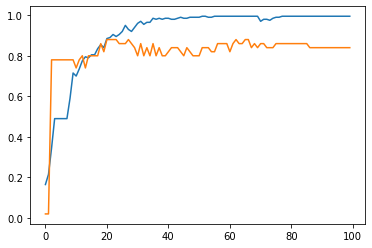

In [885]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])

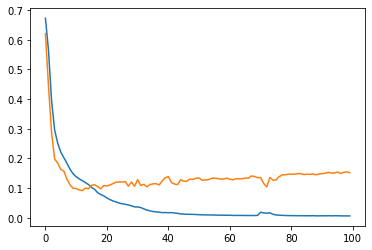

In [886]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

In [1025]:
# checking how predictions looks like

# i = 0
print('sentence: ', tokenizer.sequences_to_texts([x_test[i]])[0])
prediction = model.predict(np.array([x_test[i]])).argmax()
prediction = np.unique(y)[prediction]
print('prediction: ', prediction)
print('real value: ', np.unique(y)[np.argmax(y_test[i])])
i += 1

sentence:  viber etc need start 2 year commercial python development full
prediction:  2
real value:  2


## recommendation system

In [68]:
jobs_data = pd.read_json('data/jobs_data')

important_words = ['data science', 'machine learning', 'ml', 'sql', 'python', 'model']
jobs_data['important_sentences'] = jobs_data.clean_description.apply(lambda x: find_sentences(x, important_words))
jobs_data.head()

,job_title,company,job_description,link,clean_description,experience_sentences,experience_required,is_interesting,applied,important_sentences
0,Senior Data Scientist,Luxoft,Informacje o ofercie pracy We are seeking a Se...,https://linkedin.com/jobs/view/2922006942/?eBP...,informacje ofercie pracy seeking senior data s...,[],0,1.0,NaN,data provide insight drive r activity model p...
1,Data Scientist (Advanced Analytics),SoftServe,Informacje o ofercie pracy WE ARE Transforming...,https://linkedin.com/jobs/view/2903436761/?eBP...,informacje ofercie pracy transforming way thou...,[],0,1.0,NaN,big data internet thing iot data science expe...
2,Data Scientist,Hays,Informacje o ofercie pracy Your new company Fo...,https://linkedin.com/jobs/view/2931367173/?eBP...,informacje ofercie pracy new company client la...,[2 3 year data analysis model development expe...,2,0.0,NaN,duty include developing maintaining enhance q...
3,Data Engineer,Luxoft,Informacje o ofercie pracy Project Description...,https://linkedin.com/jobs/view/2951885884/?eBP...,informacje ofercie pracy project description s...,[],0,0.0,NaN,data processing azure preffered databricks sp...
4,Lead Data Scientist - Computer Vision,Revolut,"Informacje o ofercie pracy Since 2015, Revolut...",https://linkedin.com/jobs/view/2938739104/?eBP...,informacje ofercie pracy since 2015 revolut in...,[],0,1.0,NaN,customer simply get revolut approach data sci...


In [64]:
# changing jobs.clean_descriptions into vectors using word2vec
# sentences argument is list of job descriptions: [job_description1, job_description2, ...]

def vectorize_w2v(sentences):
    sentences = [sentence.split() for sentence in sentences]
    w2v_model = Word2Vec(sentences,
                         min_count=20,
                         window=2,
                         vector_size=300,
                         sample=6e-5, 
                         alpha=0.03, 
                         min_alpha=0.0007, 
                         negative=20)

    w2v_sentences = []

    for sentence in sentences:
        vector_sentence = []
        for word in sentence:
            try:
                vector_sentence.append(w2v_model.wv[word])
            except:
                continue

        vector_sentence = np.array(vector_sentence)
        N = len(vector_sentence)
        # adding vectors for each word in the sentece
        vector_sentence = vector_sentence.sum(axis = 0)
        vector_sentence /= N

        w2v_sentences.append(vector_sentence)

    w2v_sentences = np.array(w2v_sentences)
    
    return w2v_sentences

In [80]:
# changing jobs.clean_descriptions into vectors using word2vec and tf idf
# argument sentences is a list of job descriptions: [job_description1, job_description2, ...]

def vectorize_w2v_tfidf(sentences):
    # calculate tf idf for each word
    # we need to set token_pattern = r'\S+' in order to include words with length = 1 (single character like '1' or 'a')
    vectorizer = TfidfVectorizer(token_pattern = r'\S+')
    tf_idf_sentences = vectorizer.fit_transform(sentences)
    tf_idf_sentences = tf_idf_sentences.toarray()

    feature_names = np.array(vectorizer.get_feature_names())

    # create word2vec model
    sentences = [sentence.split() for sentence in sentences]
    vector_size = 300
    w2v_model = Word2Vec(sentences,
                         min_count=20,
                         window=2,
                         vector_size=vector_size,
                         sample=6e-5, 
                         alpha=0.03, 
                         min_alpha=0.0007, 
                         negative=20)
    
    w2v_tfidf_sentences = []

    # calculate a vector for each sentence using tf idf values and word2vec model vectors
    for sentence in sentences:
        # nominator and denominator of the value (vector) which we want to calculate for each sentence
        nominator = 0
        denominator = 0

        for word in sentence:
            try:
                # tf idf value of the word
                tf_idf_word = tf_idf_sentences[i, np.where(feature_names == word)[0][0]]

                nominator += w2v_model.wv[word] * tf_idf_word
                denominator += tf_idf_word
            except:
                continue

        try:
            sentence_vector = nominator / denominator
        except:
            sentence_vector = np.array([0 for i in range(vector_size)])
            
        w2v_tfidf_sentences.append(sentence_vector)

    w2v_tfidf_sentences = np.array(w2v_tfidf_sentences)
    
    return w2v_tfidf_sentences

In [81]:
# vectorizing job descriptions

important_sentences = jobs_data.important_sentences.values

# count vectorization
# we need to set token_pattern = r'\S+' in order to include words with length = 1 (single character like '1' or 'a')
# vectorizer = CountVectorizer(token_pattern = r'\S+')
# vectorized_job_descriptions = vectorizer.fit_transform(job_descriptions).toarray()

# word2vec vectorization
# vectorized_job_descriptions = vectorize_w2v(sentences)

# word2vec tfidf vectorization
vectorized_important_sentences = vectorize_w2v_tfidf(important_sentences)

C:\Users\mbulk\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:44: RuntimeWarning: invalid value encountered in true_divide


In [83]:
vectorized_important_sentences.shape

(737, 300)

In [85]:
# finding most similar job offers to given job description

i = 0
important_sentence = jobs_data.important_sentences.iloc[i]

cosine_similarity_matrix = cosine_similarity(vectorized_important_sentences, vectorized_important_sentences)

similarity_scores = pd.DataFrame(cosine_similarity_matrix[i])
most_similar_jobs_indexes = similarity_scores.sort_values(by = 0, ascending = False).index[1 : 6]

most_similar_jobs = jobs_data.iloc[most_similar_jobs_indexes]

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [176]:
jobs_data.iloc[i]

job_title                                                  Data Scientist
company                                                        Kontakt.io
job_description         Informacje o ofercie pracy About Kontakt.io Ko...
clean_description       informacje ofercie pracy kontakt kontakt indus...
experience_sentences                                                   []
experience_required                                                     0
Name: 0, dtype: object

In [175]:
most_similar_jobs

,job_title,company,job_description,clean_description,experience_sentences,experience_required
20,Senior Data Scientist - Personalisation,Revolut,Informacje o ofercie pracy About The Team Data...,informacje ofercie pracy team data sits heart ...,[],0
29,Senior Data Scientist - Sales,Revolut,"Informacje o ofercie pracy Since 2015, Revolut...",informacje ofercie pracy since 2015 revolut in...,[],0
207,Lead Data Scientist - Computer Vision,Revolut,"Informacje o ofercie pracy Since 2015, Revolut...",informacje ofercie pracy since 2015 revolut in...,[],0
205,Software Engineer (Data),Revolut,Informacje o ofercie pracy Seniority: Mid and ...,informacje ofercie pracy seniority mid senior ...,[],0
196,Data Engineer,Luxoft,Informacje o ofercie pracy All stages in our r...,informacje ofercie pracy stage recruitment pro...,[4 year relevant working experience],4


In [245]:
def find_offers(job_description):
    job_description = job_description.split()
    
    cond1 = 'machine learning' in job_description
    cond2 = 'ml' in job_description 
    cond3 = 'ai' in job_description 
    cond4 = 'data science' in job_description
    
    return cond1 or cond2 or cond3 or cond4

jobs_data[jobs_data.clean_description.apply(lambda x: find_offers(x))]

,job_title,company,job_description,clean_description,experience_sentences,experience_required
2,Data Scientist (Advanced Analytics),SoftServe,Informacje o ofercie pracy WE ARE Transforming...,informacje ofercie pracy transforming way thou...,[],0
6,Senior Data Scientist,Toptal,Informacje o ofercie pracy About Toptal Toptal...,informacje ofercie pracy toptal toptal global ...,[4 year professional experience],4
15,Data Scientist ML/AI,BNP Paribas Bank Polska,Informacje o ofercie pracy TWÓJ CHARAKTER Mini...,informacje ofercie pracy tw charakter minimum ...,[],0
23,Senior Data Scientist – Computer Vision,Allen Recruitment Consulting,Informacje o ofercie pracy Senior Data Scienti...,informacje ofercie pracy senior data scientist...,[],0
24,Data Scientist,Kraken Digital Asset Exchange,Informacje o ofercie pracy About Kraken As one...,informacje ofercie pracy kraken largest truste...,[5 year industry experience],5
25,Senior Data Scientist,Toptal,Informacje o ofercie pracy About Toptal Toptal...,informacje ofercie pracy toptal toptal global ...,[4 year professional experience],4
26,Data Scientist (Advanced Analytics),SoftServe,Informacje o ofercie pracy WE ARE Transforming...,informacje ofercie pracy transforming way thou...,[],0
32,Data Scientist - Growth,Kraken Digital Asset Exchange,Informacje o ofercie pracy About Kraken As one...,informacje ofercie pracy kraken largest truste...,[5 year industry experience],5
36,AI Specialist - Research Scientist,Meta,Informacje o ofercie pracy Meta is seeking Res...,informacje ofercie pracy meta seeking research...,[],0
40,Data Engineer (Remote),Frontiers,Informacje o ofercie pracy Frontiers is an awa...,informacje ofercie pracy frontier award winnin...,[],0


## labeling/aplying

In [92]:
jobs_data = pd.read_json('data/jobs_data')
jobs_data.head()

,job_title,company,job_description,link,clean_description,experience_sentences,experience_required,is_interesting,applied
0,Senior Data Scientist,Luxoft,Informacje o ofercie pracy We are seeking a Se...,https://linkedin.com/jobs/view/2922006942/?eBP...,informacje ofercie pracy seeking senior data s...,[],0,1.0,NaN
1,Data Scientist (Advanced Analytics),SoftServe,Informacje o ofercie pracy WE ARE Transforming...,https://linkedin.com/jobs/view/2903436761/?eBP...,informacje ofercie pracy transforming way thou...,[],0,1.0,NaN
2,Data Scientist,Hays,Informacje o ofercie pracy Your new company Fo...,https://linkedin.com/jobs/view/2931367173/?eBP...,informacje ofercie pracy new company client la...,[2 3 year data analysis model development expe...,2,0.0,NaN
3,Data Engineer,Luxoft,Informacje o ofercie pracy Project Description...,https://linkedin.com/jobs/view/2951885884/?eBP...,informacje ofercie pracy project description s...,[],0,0.0,NaN
4,Lead Data Scientist - Computer Vision,Revolut,"Informacje o ofercie pracy Since 2015, Revolut...",https://linkedin.com/jobs/view/2938739104/?eBP...,informacje ofercie pracy since 2015 revolut in...,[],0,1.0,NaN


In [96]:
df = jobs_data[jobs_data.applied.isnull()]
df = jobs_data[jobs_data.job_title.apply(lambda x: 'data scientist' in x.lower() or 'machine learning' in x.lower() or 'ml' in x.lower())]
# df = df[(df.job_title.apply(lambda x: 'senior' not in x.lower() and 'lead' not in x.lower())) & (df.experience_required < 2)]
df.shape

(63, 9)

In [93]:
# df = jobs_data[jobs_data.applied.isnull()]
# df = df[df.job_title.apply(lambda x: 'senior' not in x.lower() and 'lead' not in x.lower() and 'software engineer' not in x.lower() and 'data engineer' not in x.lower())]
# df.shape

In [104]:
df.iloc[ : 5]

,job_title,company,job_description,link,clean_description,experience_sentences,experience_required,is_interesting,applied
0,Senior Data Scientist,Luxoft,Informacje o ofercie pracy We are seeking a Se...,https://linkedin.com/jobs/view/2922006942/?eBP...,informacje ofercie pracy seeking senior data s...,[],0,1.0,NaN
1,Data Scientist (Advanced Analytics),SoftServe,Informacje o ofercie pracy WE ARE Transforming...,https://linkedin.com/jobs/view/2903436761/?eBP...,informacje ofercie pracy transforming way thou...,[],0,1.0,NaN
2,Data Scientist,Hays,Informacje o ofercie pracy Your new company Fo...,https://linkedin.com/jobs/view/2931367173/?eBP...,informacje ofercie pracy new company client la...,[2 3 year data analysis model development expe...,2,0.0,NaN
4,Lead Data Scientist - Computer Vision,Revolut,"Informacje o ofercie pracy Since 2015, Revolut...",https://linkedin.com/jobs/view/2938739104/?eBP...,informacje ofercie pracy since 2015 revolut in...,[],0,1.0,NaN
5,Senior Data Scientist,EPAM Systems,Informacje o ofercie pracy Description We are ...,https://linkedin.com/jobs/view/2663529279/?eBP...,informacje ofercie pracy description currently...,[],0,1.0,NaN


In [99]:
# i = 0
# i -= 1
print(df.link.iloc[i])
print(df.job_title.iloc[i])
print(i, '/', len(df))
i += 1

https://linkedin.com/jobs/view/2903436761/?eBP=CwEAAAF_VikKLqZTYLvSDpIL_-EG93K5DkdanXLVEXN2JEpEvUdHkyxD6rnaPdssaCuZMSnjXa_9MQ7dGRX-t0XVxexpL_xBBHO08brKX0TQFmJXtKIA6XVde0HX6QOGsTwIh4oWQ4Di26okRsdvsF4CeRHmUq4C6evXzNY8cfSLeTTDhlx1hMlITa1wsB8hxDp7OTlODOo3UwOFN1Gxh24KYUWjeNh4tYM3ihXbruuAwYXZIW0MVZrET3nTzaQfTQ5z1IiNeAargwGsHI2cZrUP4wftSSgOjLHvrq6zPE5igIratqK80QI6dPdvEn91I94c8cEITT-qTyRn-LdyT7di&recommendedFlavor=SKILL_ASSESSMENTS&refId=Q0IvDxEET14XGRVNmJG3ZQ%3D%3D&trackingId=RDipuHU2Oo4zhBQRd02tSA%3D%3D&trk=flagship3_search_srp_jobs
Data Scientist (Advanced Analytics)
1 / 63


In [105]:
for index in df.index:
# index = df.index[i - 1]
    jobs_data.is_interesting.loc[index] = 1
    jobs_data.applied.loc[index] = 0

c:\python\python37\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [107]:
jobs_data[jobs_data.is_interesting == 0]

,job_title,company,job_description,link,clean_description,experience_sentences,experience_required,is_interesting,applied
3,Data Engineer,Luxoft,Informacje o ofercie pracy Project Description...,https://linkedin.com/jobs/view/2951885884/?eBP...,informacje ofercie pracy project description s...,[],0,0.0,NaN
9,Middle .NET Software Engineer,SoftServe,Informacje o ofercie pracy WE ARE Our Business...,https://linkedin.com/jobs/view/2951886410/?eBP...,informacje ofercie pracy business unit team be...,[],0,0.0,NaN
10,"Senior Software Engineer, Data Management (Rem...",Zendesk,Informacje o ofercie pracy Job Description Who...,https://linkedin.com/jobs/view/2951883131/?eBP...,informacje ofercie pracy job description looki...,[],0,0.0,NaN
16,"Staff Software Engineer, Data Management (Remote)",Zendesk,Informacje o ofercie pracy Job Description Who...,https://linkedin.com/jobs/view/2951881514/?eBP...,informacje ofercie pracy job description looki...,[],0,0.0,NaN
17,"Senior Software Engineer, Data Management (Rem...",Zendesk,Informacje o ofercie pracy Job Description Who...,https://linkedin.com/jobs/view/2951879718/?eBP...,informacje ofercie pracy job description looki...,[],0,0.0,NaN
...,...,...,...,...,...,...,...,...,...
151,Senior Backend Engineer - Data Platform,Sumo Logic,Informacje o ofercie pracy Role can be remote ...,https://linkedin.com/jobs/view/2912926566/?eBP...,informacje ofercie pracy role remote anywhere ...,[6 year solid backend experience],6,0.0,NaN
152,Senior Backend Engineer - Data Platform,Sumo Logic,Informacje o ofercie pracy Role can be remote ...,https://linkedin.com/jobs/view/2912925731/?eBP...,informacje ofercie pracy role remote anywhere ...,[6 year solid backend experience],6,0.0,NaN
153,Senior Backend Engineer - Data Platform,Sumo Logic,Informacje o ofercie pracy Role can be remote ...,https://linkedin.com/jobs/view/2912925734/?eBP...,informacje ofercie pracy role remote anywhere ...,[6 year solid backend experience],6,0.0,NaN
154,Senior Backend Engineer - Data Platform,Sumo Logic,Informacje o ofercie pracy Role can be remote ...,https://linkedin.com/jobs/view/2912930261/?eBP...,informacje ofercie pracy role remote anywhere ...,[6 year solid backend experience],6,0.0,NaN


## predicting if job offer is interesting

In [211]:
x1 = jobs_data[jobs_data.is_interesting == 0].clean_description.values
x2 = jobs_data[jobs_data.is_interesting == 1].clean_description.values
x = np.concatenate((x1, x2))

y1 = jobs_data[jobs_data.is_interesting == 0].is_interesting.values
y2 = jobs_data[jobs_data.is_interesting == 1].is_interesting.values
y = np.concatenate((y1, y2))
y_cat = to_categorical(y)
y_cat = np.array(y_cat, dtype = int)

print(x.shape)
print(y.shape)

(182,)
(182,)


In [182]:
# # vectorization

# # vectorizer = CountVectorizer()
# vectorizer = TfidfVectorizer()

# x = vectorizer.fit_transform(x).toarray()
# x = x.reshape(182, 5060, 1)
# x.shape

In [212]:
# vectorization

tokenizer = Tokenizer()
tokenizer.fit_on_texts(x)

x = np.array(pad_sequences(tokenizer.texts_to_sequences(x)))
x.shape

(182, 686)

In [218]:
# preparing test/train data sets
# x_train, x_test, y_train, y_test = train_test_split(x, y_cat, test_size = 0.2)

# preparing test/train data sets
indexes = np.arange(len(x))
random.shuffle(indexes)

x_train = x[indexes]
y_train = y_cat[indexes]


# preparing model
model = Sequential()
model.add(Embedding(max(x_train.flatten()) + 1, 128, input_length  = len(x[0])))

model.add(GRU(128, return_sequences = True))
# model.add(GRU(128, input_shape = (5060, 1), return_sequences = True))
model.add(LSTM(64))

# model.add(Flatten())
model.add(Dense(32))
model.add(Dense(32))
model.add(Dense(16))

# model.add(Flatten())
model.add(Dense(len(y_train[0]), activation = 'sigmoid'))
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['acc'])

print(model.summary())

history = model.fit(x_train, y_train, epochs = 100, verbose = 1, validation_split = 0.2)

Model: "sequential_30"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_8 (Embedding)      (None, 686, 64)           325248    
_________________________________________________________________
gru_30 (GRU)                 (None, 686, 128)          74496     
_________________________________________________________________
lstm_27 (LSTM)               (None, 64)                49408     
_________________________________________________________________
dense_92 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_93 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_94 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_95 (Dense)             (None, 2)               

KeyboardInterrupt: 

In [188]:
model.evaluate(x_test, y_test)

2/2 [==============================] - 0s 63ms/step - loss: 0.7519 - acc: 0.7568


[0.7519304752349854, 0.7567567825317383]

In [216]:
plt.plot(history.history['val_loss'])

NameError: name 'history' is not defined